# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Fariz Ramadhan
- **Email:** mfariz975@gmail.com
- **ID Dicoding:** farizramadhan

## Menentukan Pertanyaan Bisnis

- Negara bagian mana yang memiliki performa penjualan terbaik?
- Kategori produk apa saja yang paling banyak terjual?
- Kategori produk mana yang memiliki revenue tertinggi?
- Pembayaran apa saja yang sering digunakan? 
- Berapa rata-rata waktu pengiriman yang telah terjadi?
- Bagaimana rata-rata rating review penjualan?
- Bagaimana tren rata-rata penjualan produk?

## Import Semua Packages/Library yang Digunakan

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [66]:
customers_df = pd.read_csv("E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [67]:
geolocation_df = pd.read_csv("E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [68]:
order_items_df = pd.read_csv("E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [69]:
order_payments_df = pd.read_csv("E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments_df.head()
order_payments_df["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [70]:
order_reviews_df = pd.read_csv("E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [71]:
orders_dataset_df = pd.read_csv("E-Commerce Public Dataset/orders_dataset.csv")
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [72]:
product_category_name_translation_df = pd.read_csv("E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [73]:
product_category_name_translation_df.count()

product_category_name            71
product_category_name_english    71
dtype: int64

In [74]:
products_dataset_df = pd.read_csv("E-Commerce Public Dataset/products_dataset.csv")
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [75]:
sellers_dataset_df = pd.read_csv("E-Commerce Public Dataset/sellers_dataset.csv")
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Setelah dilihat data tersebut. Ternyata data tersebut merupakan data penjualan dari negara bagian di Brasil 
- Data terdiri dari customer, lokasi, orderan, product, dan penjual

### Assessing Data

In [76]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [77]:
customers_df.duplicated().sum()

np.int64(0)

In [78]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [79]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [80]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [81]:
order_items_df.duplicated().sum()

np.int64(0)

In [82]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [83]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [84]:
order_payments_df.duplicated().sum()

np.int64(0)

In [85]:
order_payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [86]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [87]:
order_reviews_df.duplicated().sum()

np.int64(0)

In [88]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [89]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [90]:
orders_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [91]:
orders_dataset_df.duplicated().sum()

np.int64(0)

In [92]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [93]:
product_category_name_translation_df.duplicated().sum()

np.int64(0)

In [94]:
products_dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [95]:
products_dataset_df.duplicated().sum()

np.int64(0)

In [96]:
products_dataset_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [97]:
products_dataset_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [98]:
sellers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [99]:
sellers_dataset_df.duplicated().sum()

np.int64(0)

In [100]:
sellers_dataset_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

**Insight:**
- sebagian besar data tidak ada missing value kecuali 
    - Title dari review dan pesan nya
    - ada orderan yang tidak approved ?? karena status cancel
    - ada 600an product yang tidak berkategori, bernama, berdeskripsi dan tidak memiliki foto
- Tipe data dari membuat review nya object bukan tanggal
Untuk review biasanya ada yang meninggalkan judul serta pesan, biasanya ada yang tidak
sehingga tidak apa-apa jika NULL
- Untuk data duplikat terdapat di tabel geolocation sebanyak 261831

### Cleaning Data

In [101]:
geolocation_df.drop_duplicates(inplace=True)
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [102]:
orders_dataset_df[orders_dataset_df["order_delivered_customer_date"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


**Insight:**
- Geolocation df sudah didrop yang duplikat
- Disini kita mendapat insight baru bahwa
- order_approve, order_deliver_carrier_date, order_deliver_customer_date, order_estimate = success
- !order_approve, !order_deliver_carrier_date, !order_deliver_customer_date, order_estimate = canceled
- order_approve, !order_deliver_carrier_date, !order_deliver_customer_date, order_estimate = unavailable/processing/invoiced
- order_approve, order_deliver_carrier_date, !order_deliver_customer_date, order_estimate = shipped
- Data tersebut tidak bisa dihilangkan karena memang itu kebutuhannya jadi biarkan saja

## Exploratory Data Analysis (EDA)

### Explore ...

Mengeksplor data customers

In [103]:
customers_df["customer_id"].nunique()

99441

In [104]:
persebaran_customer = customers_df.groupby("customer_city")["customer_id"].nunique().sort_values( ascending=False)
persebaran_customer

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

Dari data kustomer dapat dilihat bahwa kota Sao Paulo memiliki banyak kustomer disana

Setelah mengeksplor data customer, kita eksplor data order

In [105]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [106]:
penjual_terbanyak = order_items_df.groupby("seller_id")["order_id"].nunique().sort_values(ascending=False)
penjual_terbanyak

seller_id
6560211a19b47992c3666cc44a7e94c0    1854
4a3ca9315b744ce9f8e9374361493884    1806
cc419e0650a3c5ba77189a1882b7556a    1706
1f50f920176fa81dab994f9023523100    1404
da8622b14eb17ae2831f4ac5b9dab84a    1314
                                    ... 
cb810bd318f51b3dc3c753944d61a1fa       1
cb4a705d00e100b9732d0ca34817d441       1
cd233f8bfa30ebfd651f47ee7d054951       1
cd2169d9f31ff6fbb9ca3373b0c9e354       1
ccbd753e6863fe7314dc6c0ca5a074e7       1
Name: order_id, Length: 3095, dtype: int64

In [107]:
top1_seller = penjual_terbanyak.head(10)

Informasi ini berguna jika ingin memberikan penhargaan kepada 10 seller yang telah menjual banyak pesanan

Di dalam data order_items terdapat product_id sehingga kita dapat menyatukan tabel tersebut
dengan join table agar dapat melihat produk apa saja yang sering dipesan
Gabungkan juga dengan kategori name agar kita bisa melihat kategori dalam bahasa inggris

In [108]:
order_product_df = pd.merge(
    order_items_df,
    products_dataset_df,
    how="left",
    on="product_id"
)
order_product_english_df = pd.merge(
    order_product_df,
    product_category_name_translation_df,
    how="left",
    on="product_category_name"
)
order_product_english_df.to_csv("order_product_english_df.csv", index=False)

In [109]:
order_product_english_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [110]:
#Cek jumlah produk terjuan per kategori
top_categories = order_product_english_df.groupby("product_category_name_english")["order_id"].count().sort_values(ascending=False)
top_categories

product_category_name_english
bed_bath_table               11115
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
arts_and_craftmanship           24
la_cuisine                      14
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: order_id, Length: 71, dtype: int64

Dapat dilihat produk kategori bed_bath_table paling banyak terjual diikuti dengan kesehatan dan kecantikan lalu olahraga

Mungkin itu produk kategori yang paling banyak terjual
bagaimana dengan produk yang menghasilkan lebih banyak uang / Revenue?

In [111]:
top_revenue = order_product_english_df.groupby(by="product_category_name_english").agg({
    "price":"sum"
}).sort_values(by="price", ascending=False) 
top_revenue

,price
product_category_name_english,
health_beauty,1258681.34
watches_gifts,1205005.68
bed_bath_table,1036988.68
sports_leisure,988048.97
computers_accessories,911954.32
...,...
flowers,1110.04
home_comfort_2,760.27
cds_dvds_musicals,730.00


Semuanya kurang lebih sama, yang menariknya kategori watches gifts menghasilkan revenue yang tinggi. Karena
dijual dengan harga yang mahal

Kita eksplor mengenai pembayaran dari pesanan tersebut

Eksplor order Payment

In [112]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [113]:
payment_counts = order_payments_df["payment_type"].value_counts()
payment_counts

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Credit card paling sering digunakan dan berbeda jauh dengan yang lainnya

Sekarang eksplor orders review dataset agar dapat menemukan rata-rata kepuasan pelanggan

In [114]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [115]:
order_reviews_df["review_score"].mean()

np.float64(4.08642062404257)

In [116]:
review = order_reviews_df["review_score"].value_counts().sort_index()
review

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

Score review sudah menjelaskan bahwa sudah banyak yang mereview bintang 5, Dengan keseluruhan rata-rata review 4.0 sekian

Yang terakhir kita akan melihat tren penjualan dari data orders dengan menghitung jumlah order approved dan
tanggal pemesanan dan diterima tersebut

In [117]:
# Mengonversi tanggal pada dataset orders
orders_dataset_df["order_purchase_timestamp"] = pd.to_datetime(orders_dataset_df["order_purchase_timestamp"])

# Membuat agregasi jumlah pesanan per bulan
orders_trend = orders_dataset_df.set_index("order_purchase_timestamp").resample("ME").size()

orders_trend.tail()

order_purchase_timestamp
2018-06-30    6167
2018-07-31    6292
2018-08-31    6512
2018-09-30      16
2018-10-31       4
Freq: ME, dtype: int64

Pesanan meningkat hingga bulan agustus 2018, akan tetapi pada akhir data terjadi penurunan data. kemungkinan
ada pesanan yang tidak lengkap datanya setelah periode tersebut

Bagaimana dengan rata-rata waktu pengirimannya?

In [118]:
orders_dataset_df["order_delivered_customer_date"] = pd.to_datetime(orders_dataset_df["order_delivered_customer_date"])
orders_dataset_df["range_time"] = (orders_dataset_df["order_delivered_customer_date"] - orders_dataset_df["order_purchase_timestamp"]).dt.days

orders_dataset_df["range_time"].describe()

count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: range_time, dtype: float64

Rata-rata pengiriman terjadi kurang lebih 12 hari dengan 25% pesanan 6 hari kebawah dan 75% diatas ada 15 hari keatas
max disini 209 hari, ntah itu kesalahan entry data atau bagaimana

**Insight:**
- Dari data kustomer dapat dilihat bahwa kota Sao Paulo memiliki banyak kustomer disana
- Dari data order dan seller juga menemukan informasi ini berguna jika ingin memberikan penhargaan kepada 10 seller yang telah menjual banyak pesanan
- Dapat dilihat produk kategori bed_bath_table paling banyak terjual diikuti dengan kesehatan dan kecantikan lalu olahraga
- Untuk revenue, Semuanya kurang lebih sama dengan paling banyak terjual, yang menariknya kategori watches gifts menghasilkan revenue yang tinggi. Karena
dijual dengan harga yang mahal
- Credit card paling sering digunakan dan berbeda jauh dengan yang lainnya
- Score review sudah menjelaskan bahwa sudah banyak yang mereview bintang 5, Dengan keseluruhan rata-rata review 4.0 sekian
- Pesanan meningkat hingga bulan agustus 2018, akan tetapi pada akhir data terjadi penurunan data. kemungkinan
ada pesanan yang tidak lengkap datanya setelah periode tersebut
- Rata-rata pengiriman terjadi kurang lebih 12 hari dengan 25% pesanan 6 hari kebawah dan 75% diatas ada 15 hari keatas
max disini 209 hari, ntah itu kesalahan entry data atau bagaimana

## Visualization & Explanatory Analysis

### Pertanyaan 1: Negara bagian mana yang memiliki performa penjualan terbaik ?

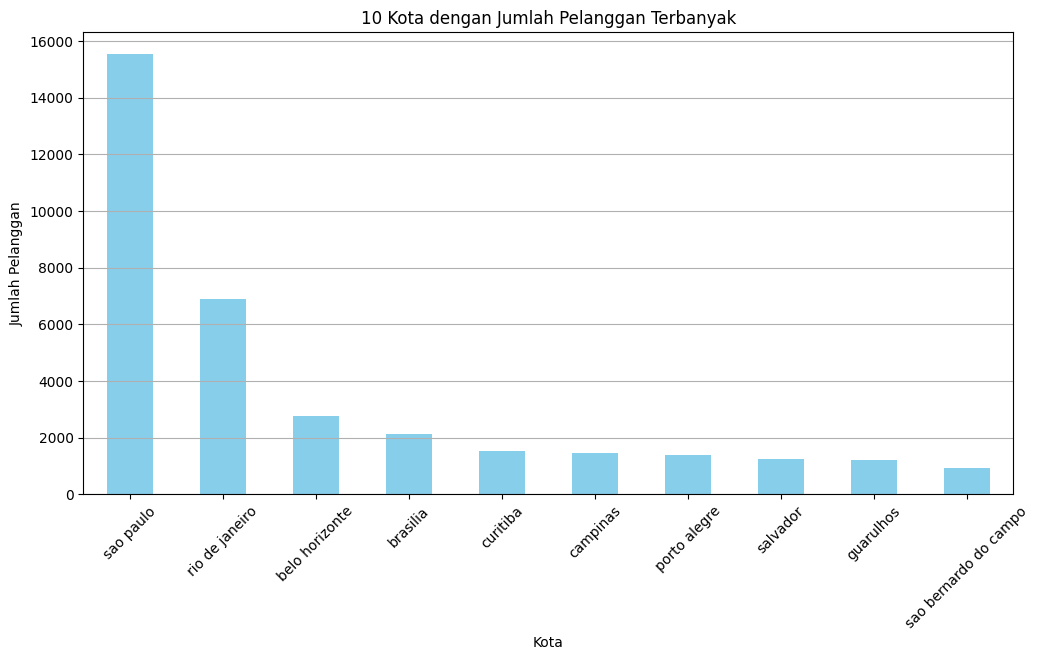

In [119]:
top10_cities = persebaran_customer.head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
top10_cities.plot(kind="bar", color="skyblue")
plt.title("10 Kota dengan Jumlah Pelanggan Terbanyak")
plt.xlabel("Kota")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

### Pertanyaan 2: Kategori produk apa saja yang paling banyak terjual?

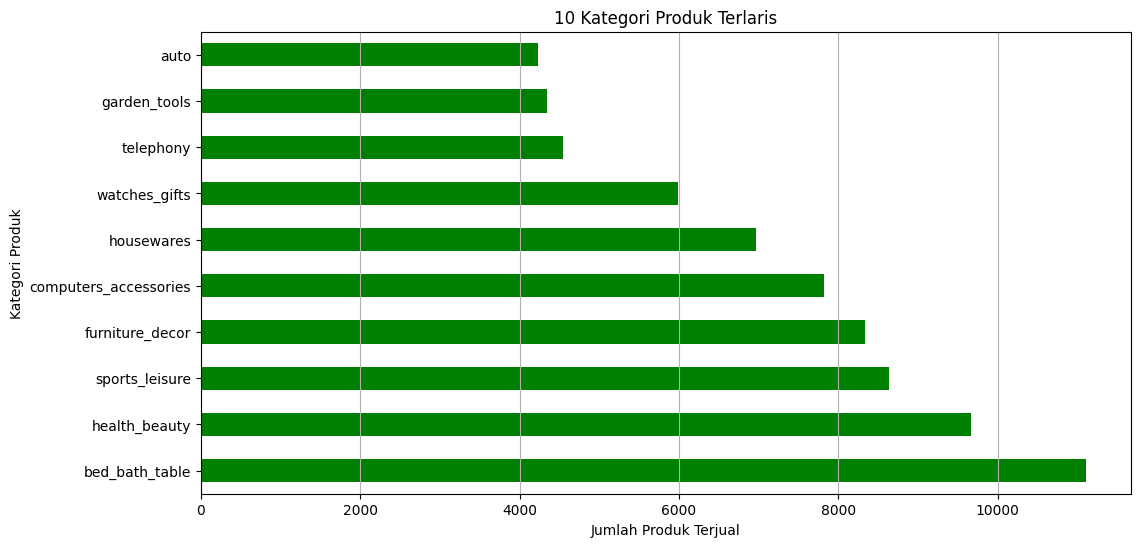

In [120]:
top10_categories = top_categories.head(10)
plt.figure(figsize=(12, 6))
top10_categories.plot(kind="barh", color="green")
plt.title("10 Kategori Produk Terlaris")
plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Kategori Produk")
plt.grid(axis="x")
plt.show()

### Pertanyaan 3: Kategori produk mana yang memiliki revenue tertinggi?

<Figure size 1200x600 with 0 Axes>

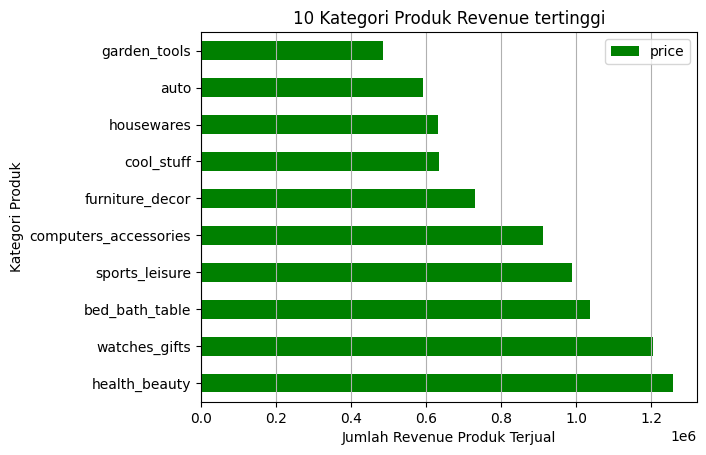

In [121]:
top10_revenue = top_revenue.head(10)
plt.figure(figsize=(12, 6))
top10_revenue.plot(kind="barh", color="green")
plt.title("10 Kategori Produk Revenue tertinggi")
plt.xlabel("Jumlah Revenue Produk Terjual")
plt.ylabel("Kategori Produk")
plt.grid(axis="x")
plt.show()

### Pertanyaan 4: Pembayaran apa saja yang sering digunakan? 

C:\Users\acer\AppData\Local\Temp\ipykernel_11844\996151909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")


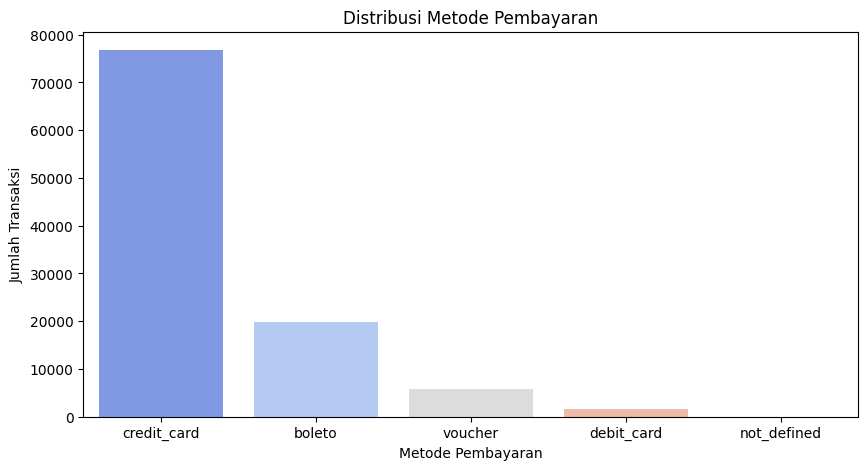

In [122]:
payment_counts = order_payments_df["payment_type"].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.show()

### Pertanyaan 5: Berapa rata-rata waktu pengiriman yang telah terjadi? 

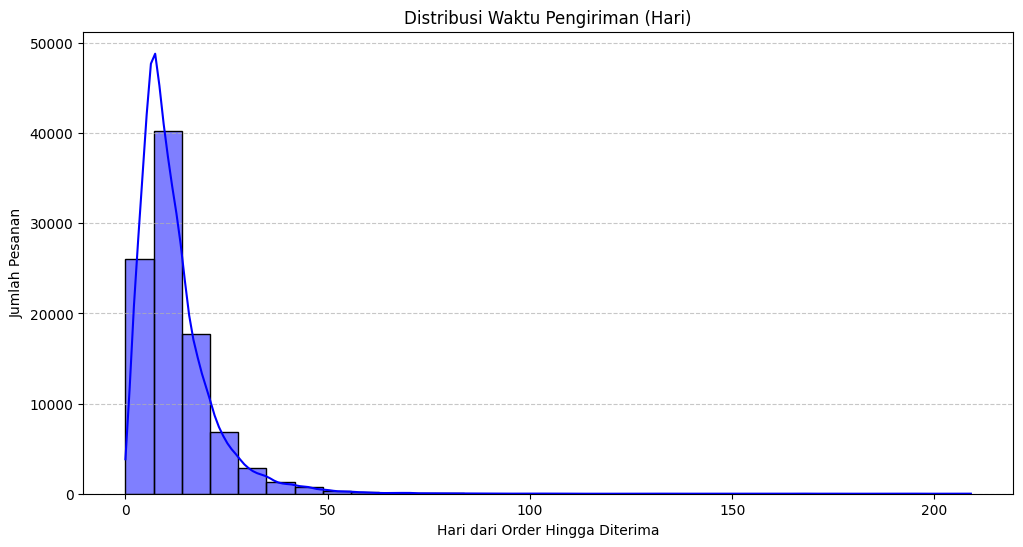

In [123]:
plt.figure(figsize=(12, 6))
sns.histplot(orders_dataset_df["range_time"], bins=30, kde=True, color="blue", alpha=0.5)

# Tambahkan judul dan label
plt.title("Distribusi Waktu Pengiriman (Hari)")
plt.xlabel("Hari dari Order Hingga Diterima")
plt.ylabel("Jumlah Pesanan")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

### Pertanyaan 6: Bagaimana rata-rata rating review penjualan?

C:\Users\acer\AppData\Local\Temp\ipykernel_11844\194536789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review.index, y=review.values, palette="coolwarm")


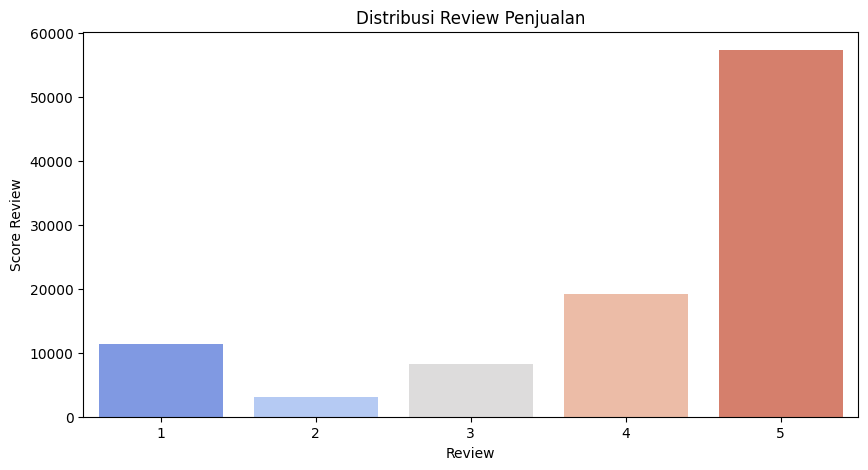

In [124]:
plt.figure(figsize=(10, 5))
sns.barplot(x=review.index, y=review.values, palette="coolwarm")
plt.title("Distribusi Review Penjualan")
plt.xlabel("Review")
plt.ylabel("Score Review")
plt.show()

### Pertanyaan 7 : Bagaimana tren rata-rata penjualan produk?

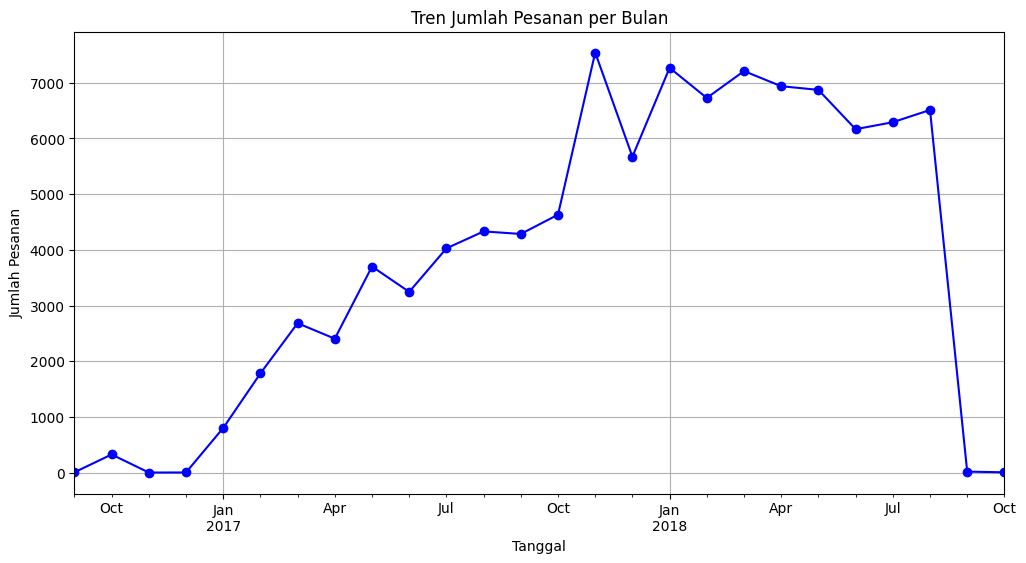

In [125]:
# Visualisasi tren jumlah pesanan
plt.figure(figsize=(12, 6))
orders_trend.plot(marker="o", linestyle="-", color="b")
plt.title("Tren Jumlah Pesanan per Bulan")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pesanan")
plt.grid(True)
plt.show()


**Insight:**
- Semua pertanyaan dapat dihasilkan melalui EDA dan dapat visualisasikan dengan menggunakan matplotlib dan seaborn
- Terdapat beberapa data lagi yang dapat dieksplor akan tetapi saya cukupkan sampai disini terlebih dahulu

## Analisis Lanjutan (Opsional)

Sedikit tambahan dengan RFM mengenai pelanggan terbaru melakukan transaksi, yang sering transaksi, dan paling banyak pengeluarannya
Mengenai analisis RFM ini dapat ditemukan sebagai berikut
1. Resensi kita mencari tau customer yang melakukan transaksi terakhir yang diketahui dari melihat nilai max dari order terakhir pada tabel orders, kemudian dikurang dengan hari customer memesan produk. lalu diurutkan dari yang paling rendah
2. Frequency sudah tentu didapat dengan 1 kustomer yang memiliki banyak order dan dicari urutan dari yang paling banyak (groupby nunique dan sort ascending)
3. Monetary dilihat dari order yang memiliki price tinggi. orders item harus digabung dengan orders dataset karena gar mengetahui harga dari produk tersebut di dataset order yang memiliki kolom prices serta order

C:\Users\acer\AppData\Local\Temp\ipykernel_11844\2870461092.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="customer_id",
C:\Users\acer\AppData\Local\Temp\ipykernel_11844\2870461092.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Frequency", x="customer_id",
C:\Users\acer\AppData\Local\Temp\ipykernel_11844\2870461092.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Monetary", x="customer_id",


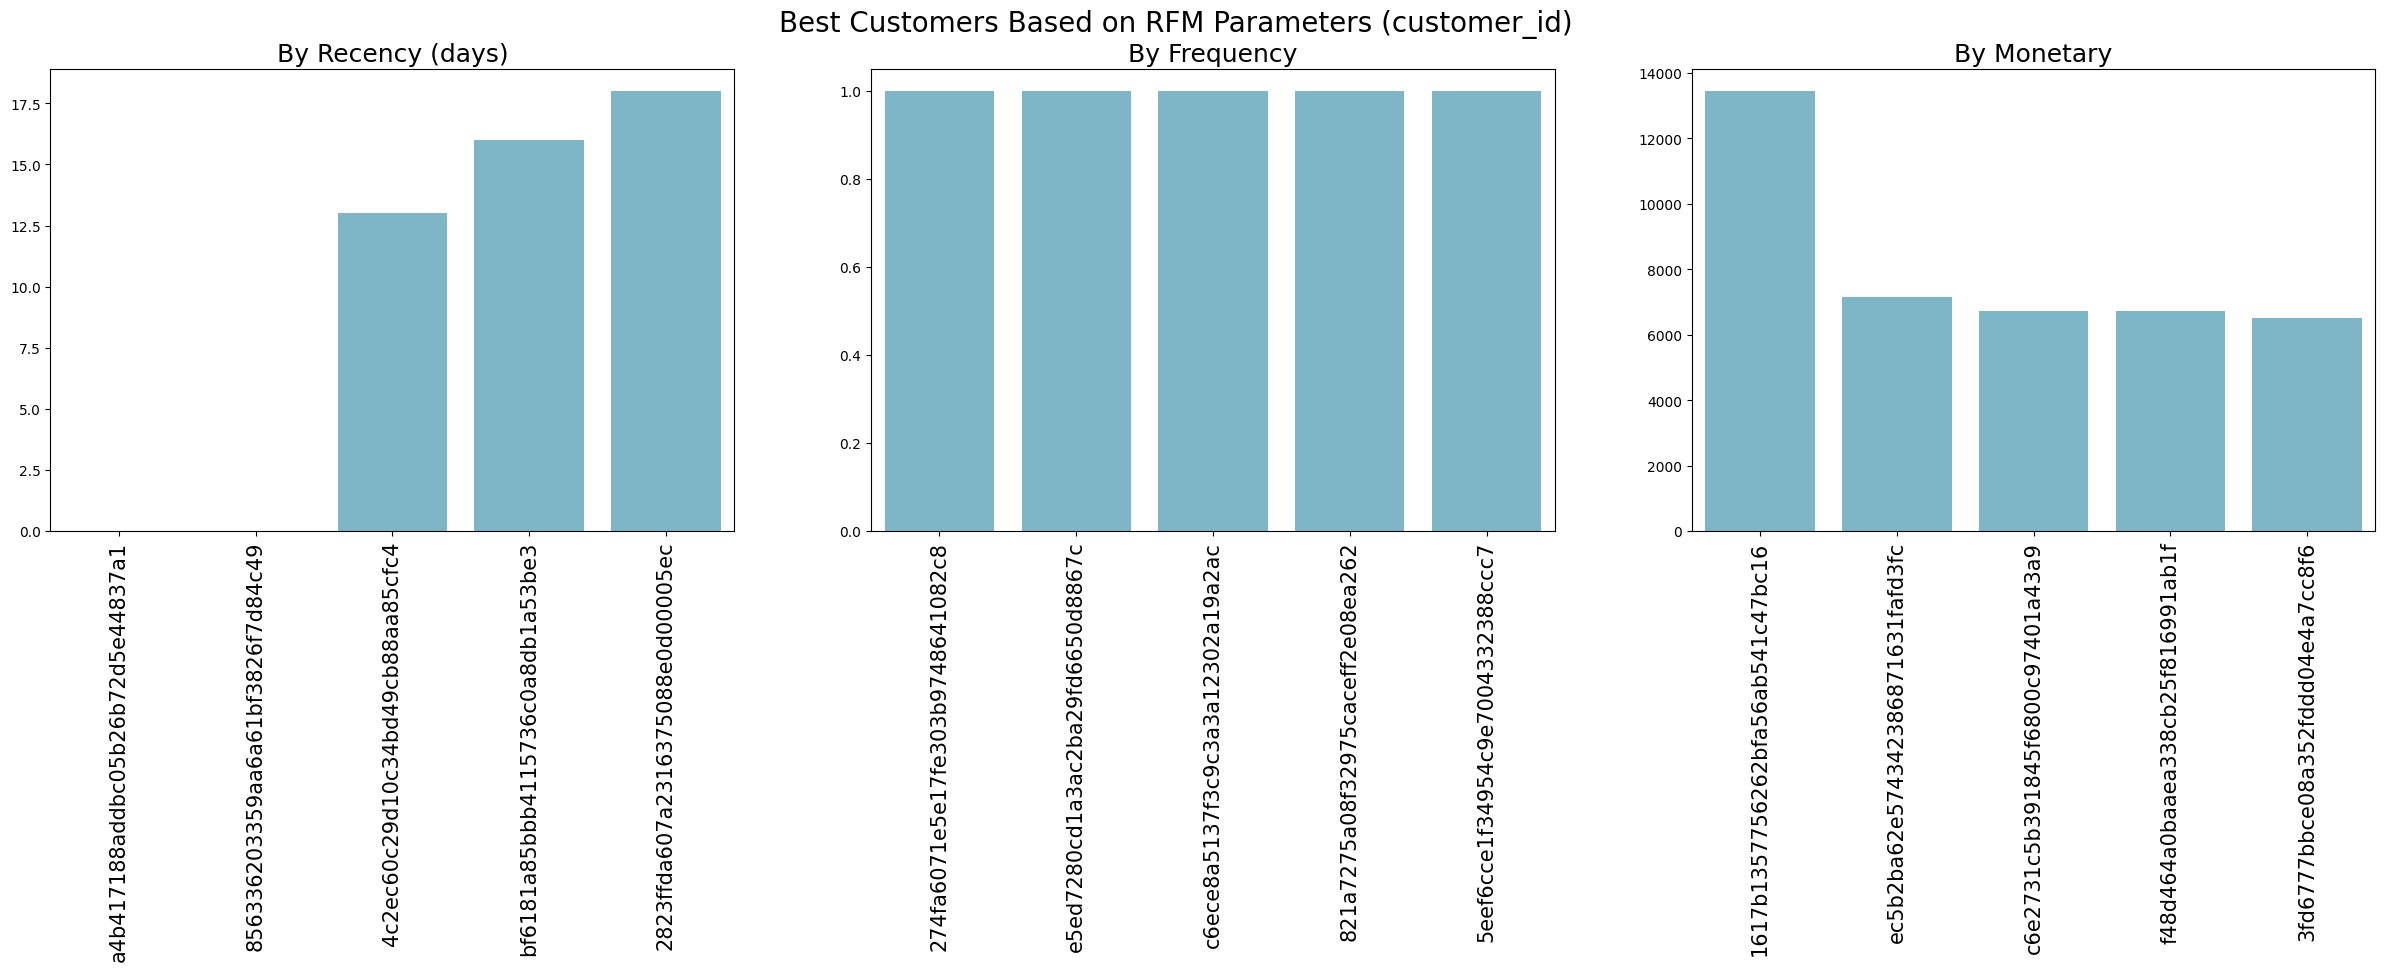

In [126]:
orders_dataset_df["order_purchase_timestamp"] = pd.to_datetime(orders_dataset_df["order_purchase_timestamp"])

# Menentukan tanggal referensi (misalnya, tanggal terakhir dalam dataset)
reference_date = orders_dataset_df["order_purchase_timestamp"].max()

# Menghitung Recency (jumlah hari sejak transaksi terakhir)
recency_df = orders_dataset_df.groupby("customer_id")["order_purchase_timestamp"].max().reset_index()
recency_df["Recency"] = (reference_date - recency_df["order_purchase_timestamp"]).dt.days

# Menghitung Frequency (jumlah transaksi unik per pelanggan)
frequency_df = orders_dataset_df.groupby("customer_id")["order_id"].nunique().reset_index()
frequency_df.columns = ["customer_id", "Frequency"]

# Menghitung Monetary (total pengeluaran pelanggan)
monetary_df = order_items_df.groupby("order_id")["price"].sum().reset_index()
monetary_df = orders_dataset_df.merge(monetary_df, on="order_id", how="left").groupby("customer_id")["price"].sum().reset_index()
monetary_df.columns = ["customer_id", "Monetary"]

# Menggabungkan hasil RFM
rfm_df = customers_df.merge(recency_df, on="customer_id").merge(frequency_df, on="customer_id").merge(monetary_df, on="customer_id")

# Menampilkan hasil RFM untuk beberapa pelanggan pertama
rfm_df.head(10)
rfm_df.to_csv("rfm_df.csv", index=False)

# Menentukan ukuran figure dan jumlah subplots (3 grafik dalam 1 baris)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Warna untuk setiap grafik
colors = ["#72BCD4"] * 5

# Plot Recency (Pelanggan dengan waktu transaksi terbaru)
sns.barplot(y="Recency", x="customer_id", 
            data=rfm_df.sort_values(by="Recency", ascending=True).head(5), 
            palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=90)

# Plot Frequency (Pelanggan dengan transaksi terbanyak)
sns.barplot(y="Frequency", x="customer_id", 
            data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), 
            palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)

# Plot Monetary (Pelanggan dengan total pengeluaran tertinggi)
sns.barplot(y="Monetary", x="customer_id", 
            data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), 
            palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)

# Tambahkan judul utama
plt.suptitle("Best Customers Based on RFM Parameters (customer_id)", fontsize=20)

# Tampilkan plot
plt.show()

Setiap customer dari hari ada yang baru melakukan transaksi, kemudian frekuensi tidak banyak karena orang melakukan sekali transaksi, monetary paling tinggi terletak di angka mendekati 14000

## Conclusion

- Conclution pertanyaan 1 adalah dari data customer tersebut kita dapat menentukan bahwa seluruh data ini merupakan data penjualan di daerah brazil dan tersebar di beberapa kota dengan kota tertinggi yaitu di sao paulo
- Conclution pertanyaan 2 adalah kita dapat menemukan produk apa yang paling banyak terjual berdasarkan kategori tersebut
- conclution pertanyaan 3 kita dapat menentukan produk mana yang memiliki revenue yang tertinggi sehingga dapat kita maksimalkan
- conclution pertanyaan 4 kita menemukan bahwa pembayaran dengan kartu kredit sering digunakan oleh customer
- conclution pertanyaan 5 waktu pengiriman dapat ditentukan dari data yang tersedia dengan rata-rata 12 hari
- conclution pertanyaan 6 kita menemukan bahwa rating rata-rata dari penjualan kita mencapai 4 keatas dengan banyak yang rating bintang 5
- conclution pertanyaan 7 kita dapat melihat tren penjualan perbulan